# Decision Tree

In [2]:
import sklearn.tree
sklearn.tree.__all__



['BaseDecisionTree',
 'DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 'export_graphviz',
 'plot_tree',
 'export_text']

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
dataset = load_iris()

x = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
y = dataset.target

In [5]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [24]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.__dict__

{'criterion': 'entropy',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'ccp_alpha': 0.0}

In [25]:
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9555555555555556

In [26]:
pred = model.predict(x_test)

In [27]:
print(confusion_matrix(y_test, pred))

[[17  0  0]
 [ 0 12  2]
 [ 0  0 14]]


In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.86      0.92        14
           2       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



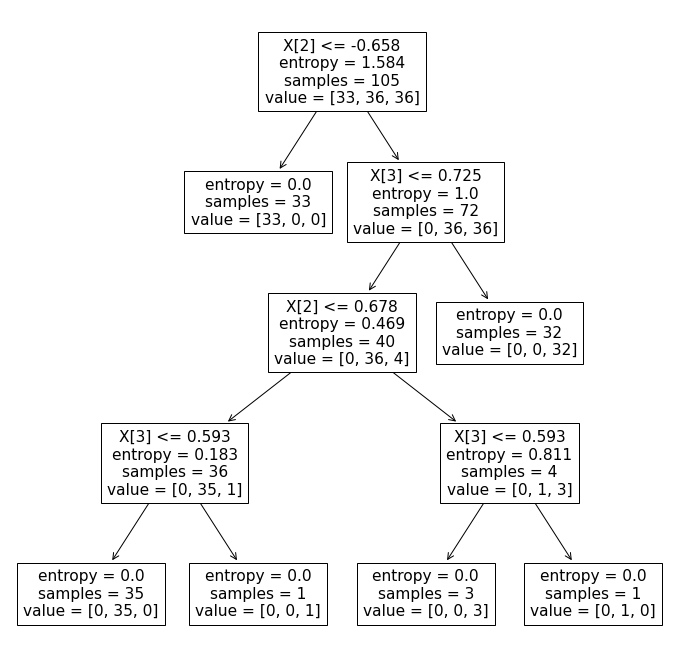

In [29]:
plt.figure(figsize=(12,12))
tree.plot_tree(model)
plt.show()